In [31]:
### WEB TRACKING ASSIGNMENT IV
print("*************************************")
print(" \033[1m" + "Flip Robo Practice Project Phase 2B" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Practice Project Phase 2B
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [32]:
print("---------------------------------\n")
print("\033[1m" + "World Happiness Report Project\n" + "\033[0m")
print("---------------------------------\n")


---------------------------------

World Happiness Report Project

---------------------------------



# Loading Libraries

In [154]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, r2_score, explained_variance_score, max_error
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# Loading the Dataset

In [63]:
data = pd.read_csv('happiness_score_dataset.csv')

# About the Data

In [57]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [58]:
# Generate statistical summaries of the dataset
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Exploratory Data Analysis (EDA)

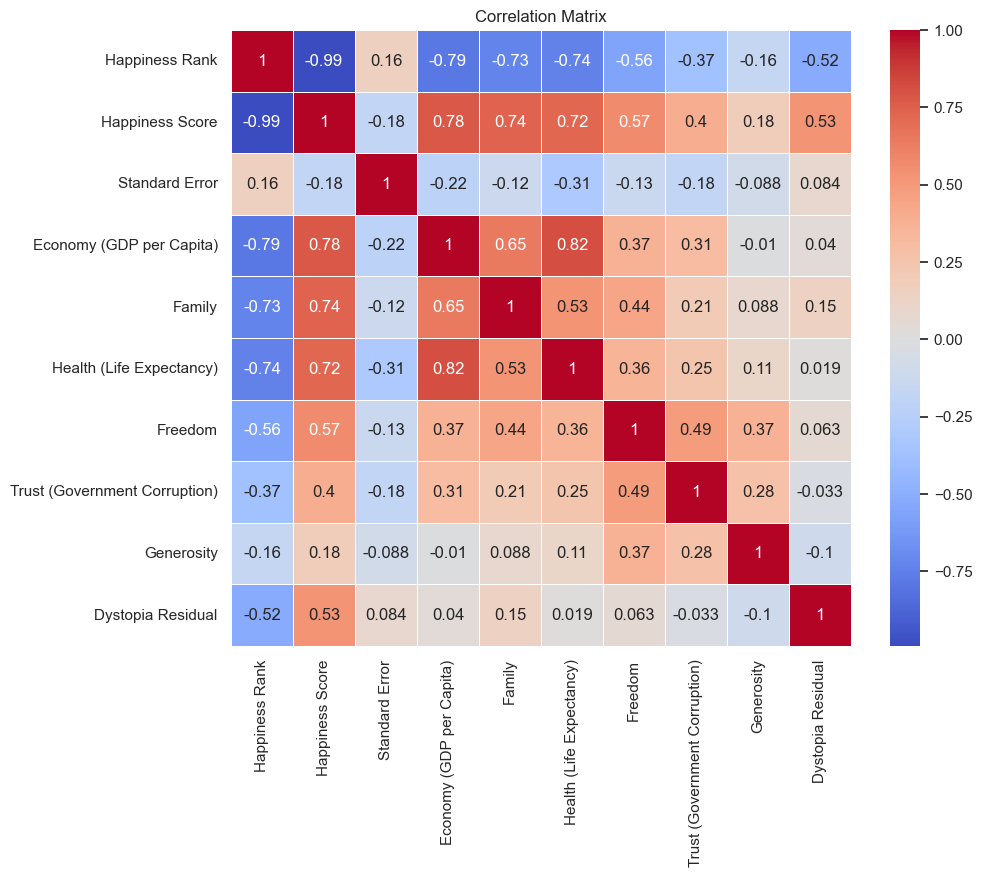

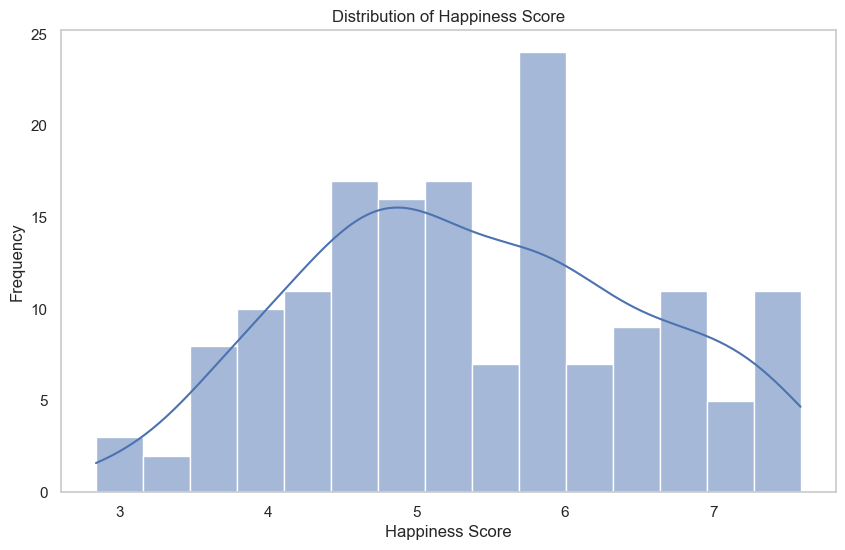

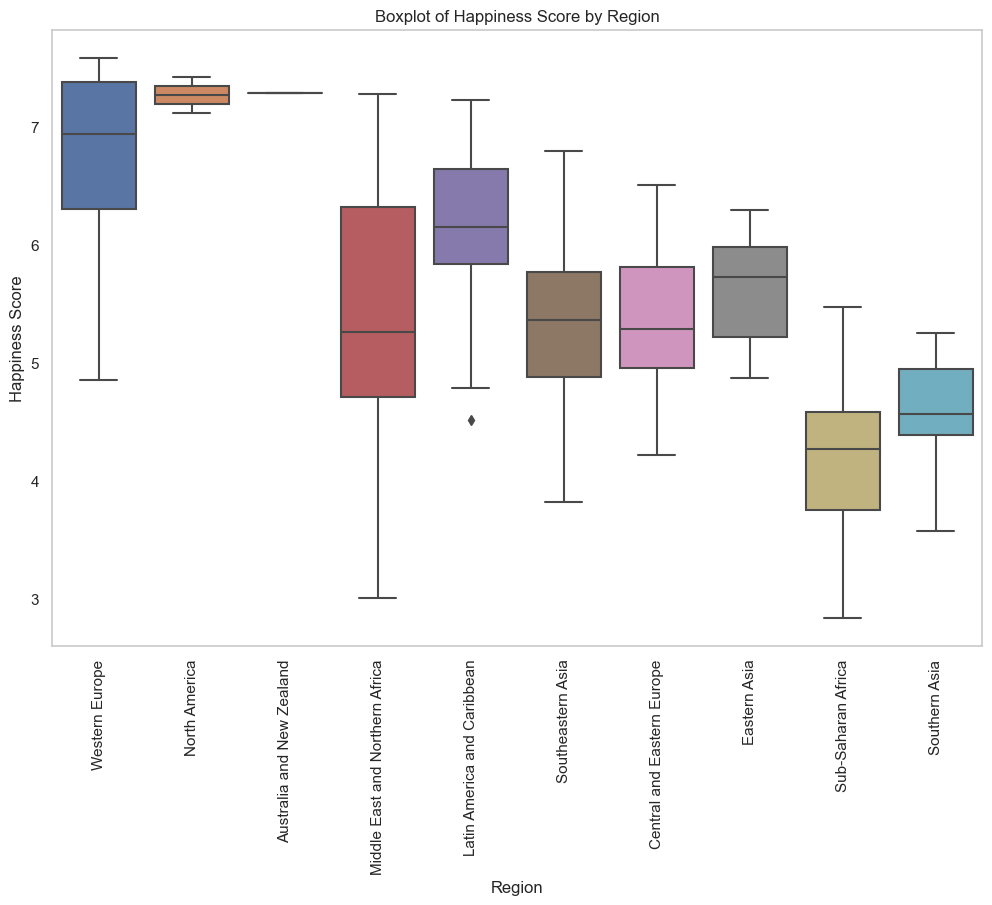

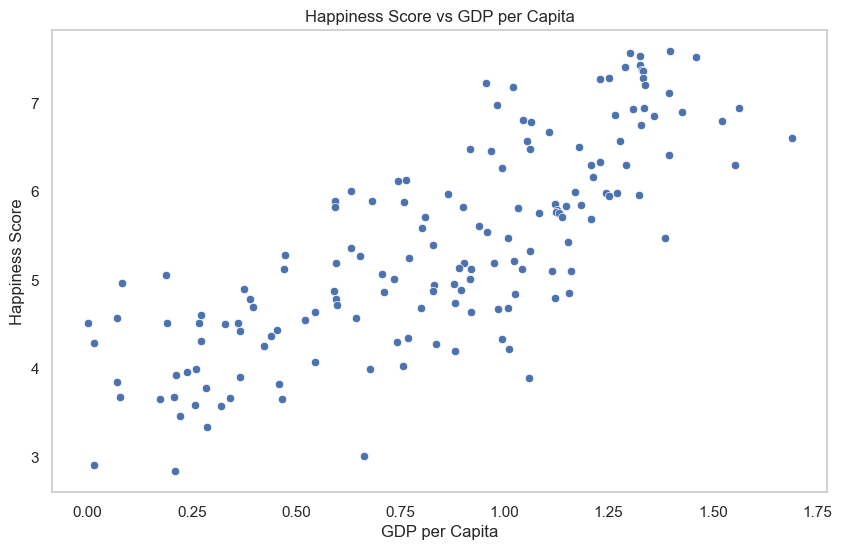

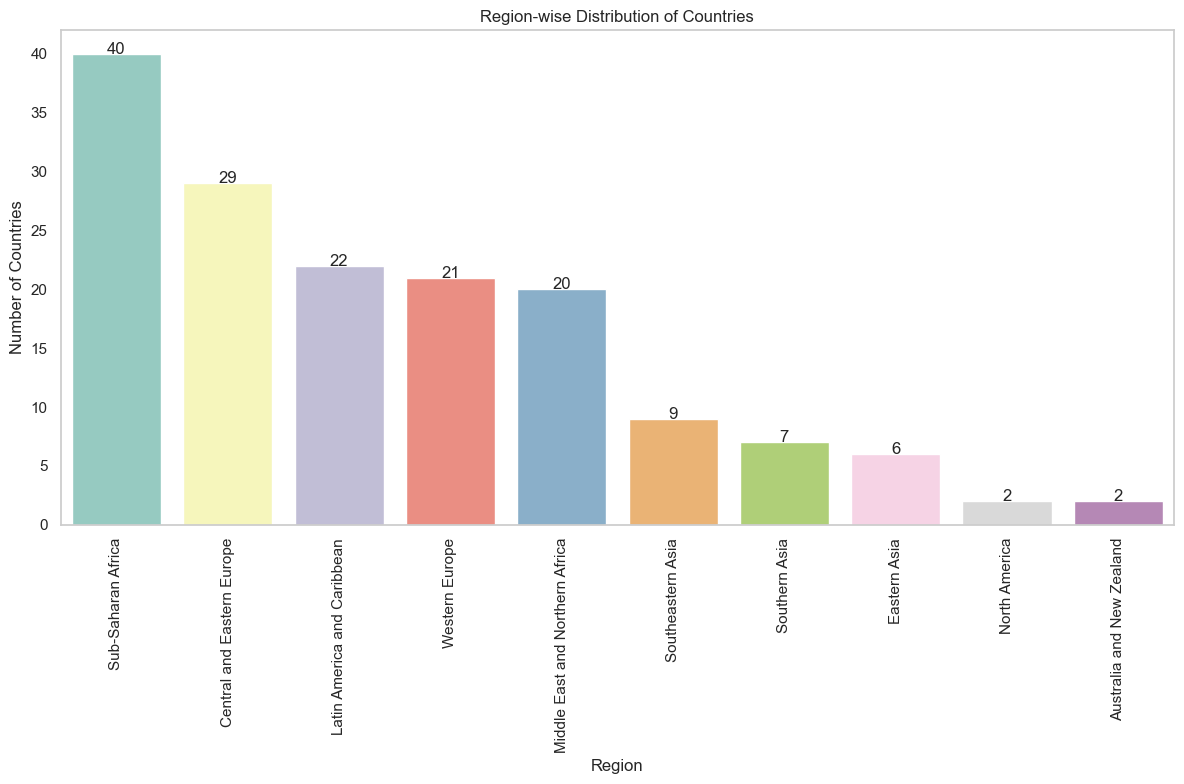

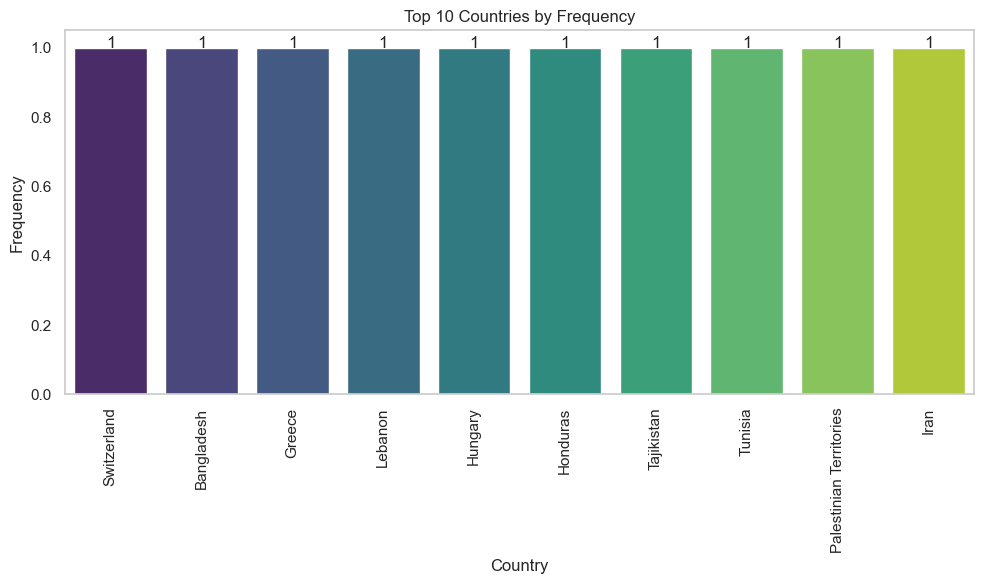

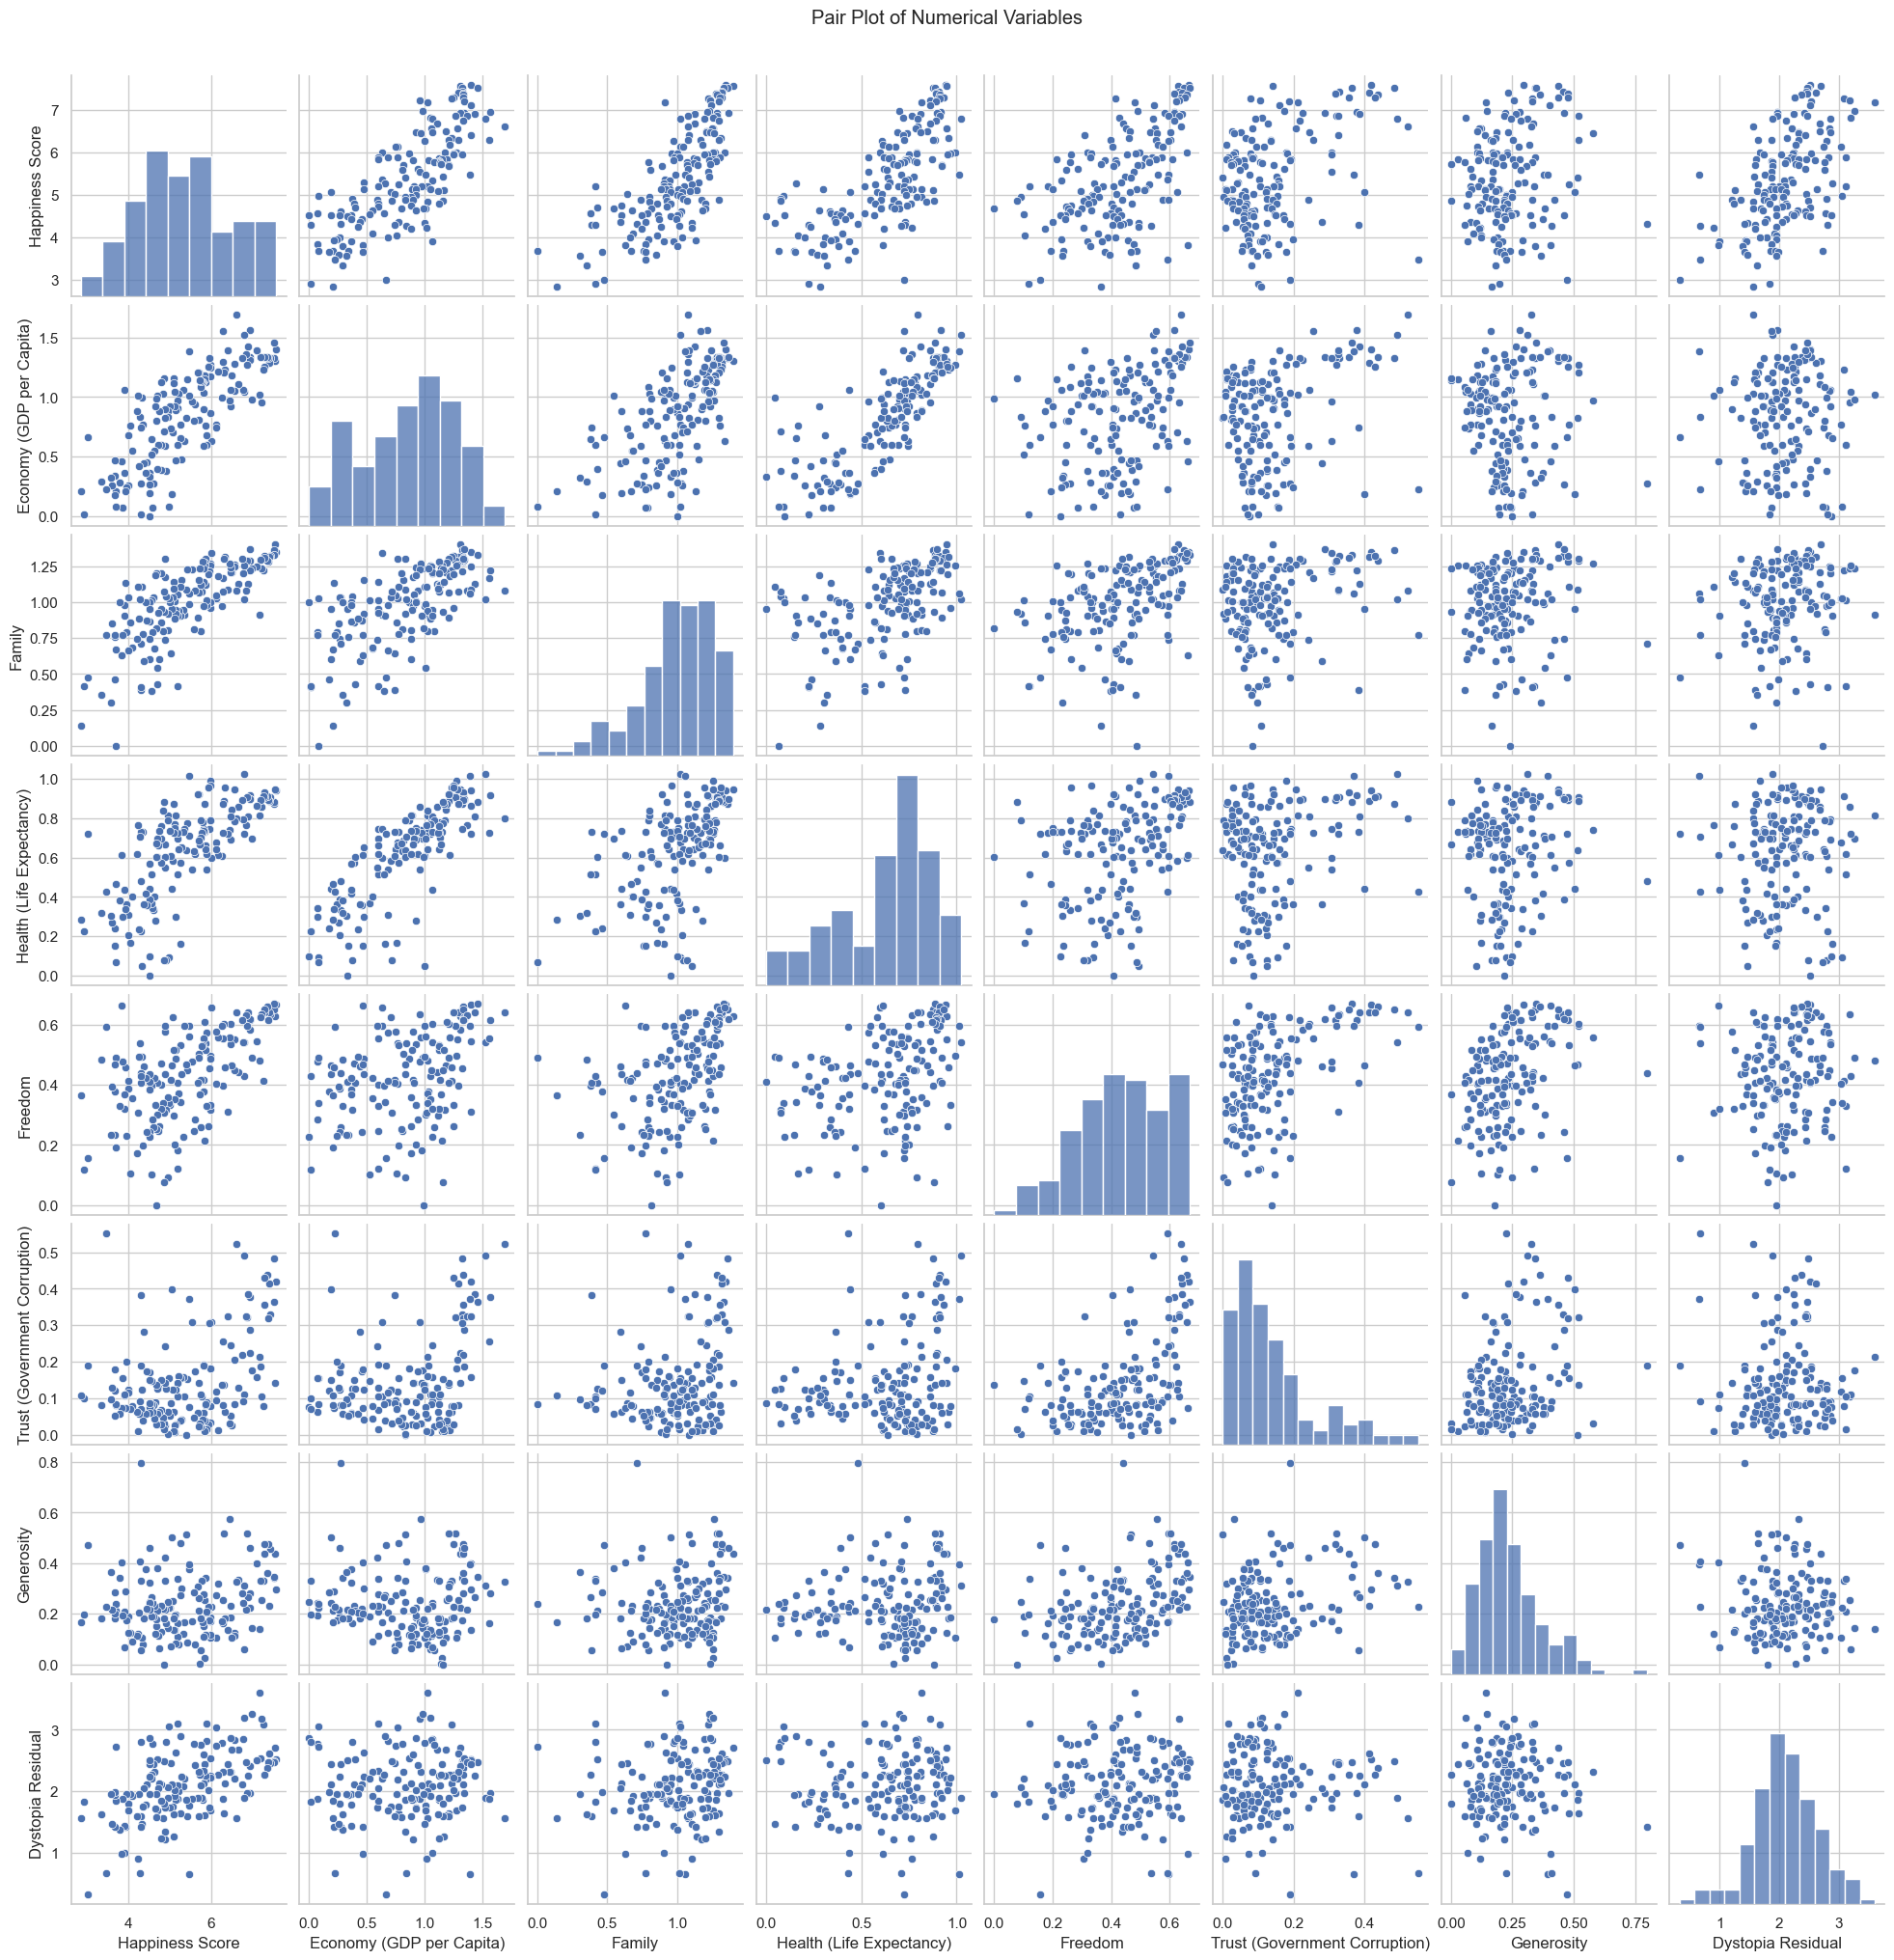

In [176]:
# Set the style for the plots
sns.set(style="whitegrid")

# Pairwise correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.grid(False)  # Remove the grid
plt.show()

correlation_matrix

# Distribution of Happiness Score
plt.figure(figsize=(10, 6))
sns.histplot(data["Happiness Score"], bins=15, kde=True)
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid(False)  # Remove the grid
plt.show()

# Boxplot of Happiness Score by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x="Region", y="Happiness Score", data=data)
plt.xticks(rotation=90)
plt.title("Boxplot of Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.grid(False)  # Remove the grid
plt.show()

# Scatter plot: Happiness Score vs GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Economy (GDP per Capita)", y="Happiness Score", data=data)
plt.title("Happiness Score vs GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.grid(False)  # Remove the grid
plt.show()

# Count plot: Region-wise distribution of countries
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Region", data=data, palette="Set3", order=data["Region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Region-wise Distribution of Countries")
plt.xlabel("Region")
plt.ylabel("Number of Countries")
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.tight_layout()  
plt.grid(False)  # Remove the grid
plt.show()

# Count plot: Top 10 countries by frequency
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis", order=top_countries.index)
plt.xticks(rotation=90)
plt.title("Top 10 Countries by Frequency")
plt.xlabel("Country")
plt.grid(False)  # Remove the grid
plt.ylabel("Frequency")
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.tight_layout()  
plt.grid(False)  # Remove the grid
plt.show()


# Selecting numerical columns for the pair plot
numerical_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                     'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Create a pair plot
sns.pairplot(data[numerical_columns])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.grid(False)  # Remove the grid
plt.show()

# Data Pre-processing

* We drop columns that are not directly usable for prediction: "Country" (categorical), and "Happiness Rank" (redundant with "Happiness Score").
* Excluding the "Country" column can simplify the model and eliminate potential overfitting caused by having a large number of unique categories (countries). The model's focus would then be on the other factors like GDP per Capita, Family, Health, etc., which might be more directly related to happiness scores and generalizable across different countries.
* Without the "Country" column, the model's predictions will rely solely on the provided attributes like GDP per Capita, Family, Health, etc. This can lead to more interpretable insights about what specific factors influence happiness scores.

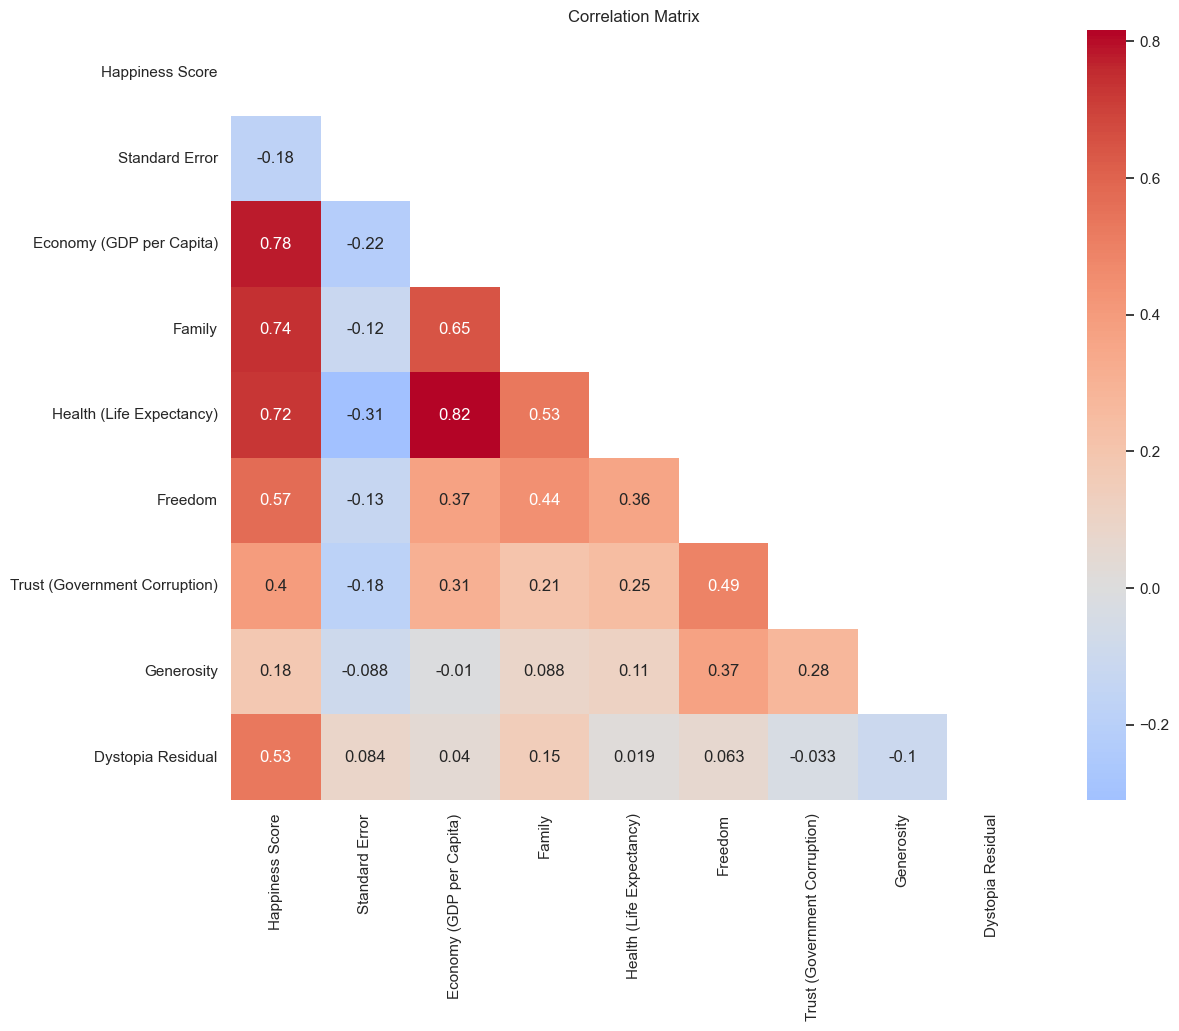

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [173]:
# Drop unnecessary columns for exploration
data2 = data.drop(['Country', 'Happiness Rank'], axis=1)

# Calculate correlation matrix
correlation_matrix = data2.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot triangle correlation heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix')
plt.grid(False)  # Remove the grid
plt.show()


# Display the correlation matrix (optional)
correlation_matrix


From the above correlation matrix, we can gather several insights about the relationships between the features and the target variable ("Happiness Score"):

**1. Strong Positive Correlations**:

* Features with strong positive correlations to "Happiness Score" (values closer to 1) are "Economy (GDP per Capita)," "Family," "Health (Life Expectancy)," and "Freedom." This suggests that countries with higher GDP, stronger family and social support, better health, and more freedom tend to have higher happiness scores.

**2. Moderate Correlations:**

* "Dystopia Residual" also has a moderate positive correlation with "Happiness Score." This indicates that the unexplained or residual happiness, even after accounting for other factors, still contributes to the overall happiness score.

**3. Weak Correlations:**

* Features like "Generosity" and "Trust (Government Corruption)" have weak positive correlations with "Happiness Score." This suggests that while they do contribute to happiness, their influence might not be as strong as other factors.

**4. Negative Correlations:**

* "Standard Error" has a weak negative correlation with "Happiness Score," indicating that countries with lower standard errors in happiness scores tend to have slightly higher happiness scores.

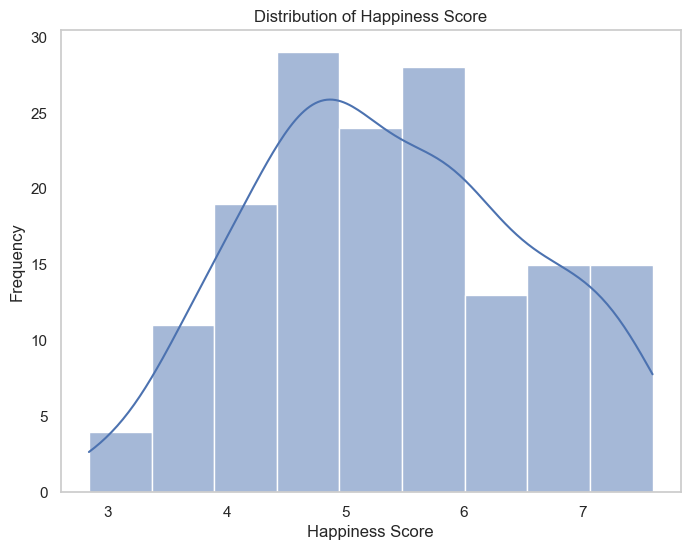

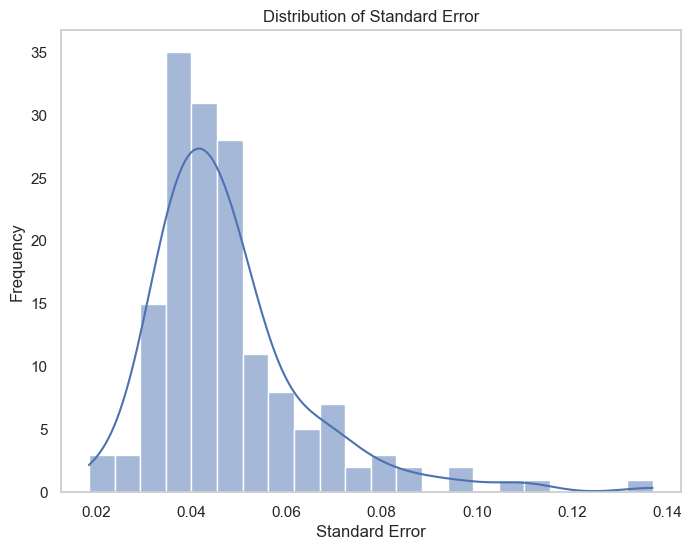

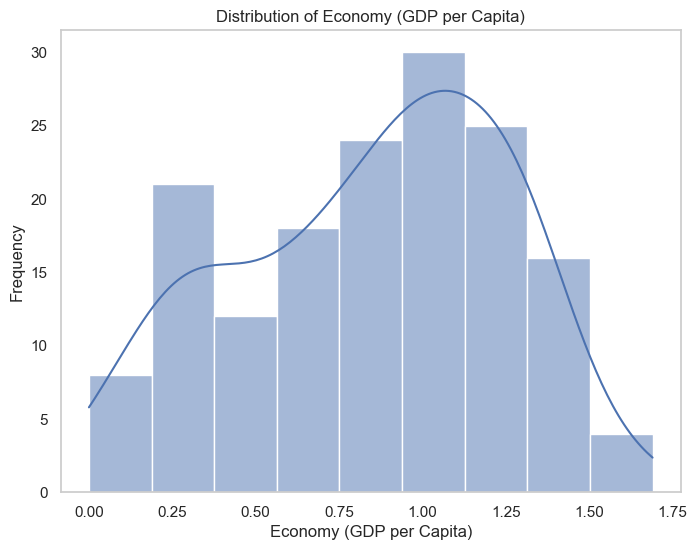

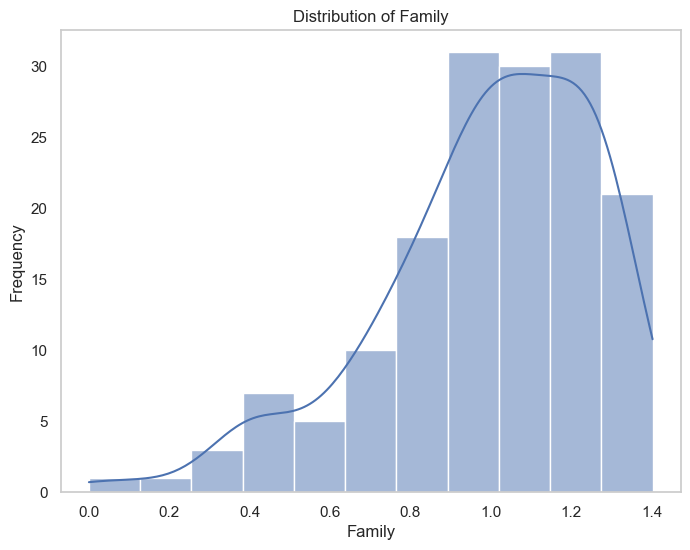

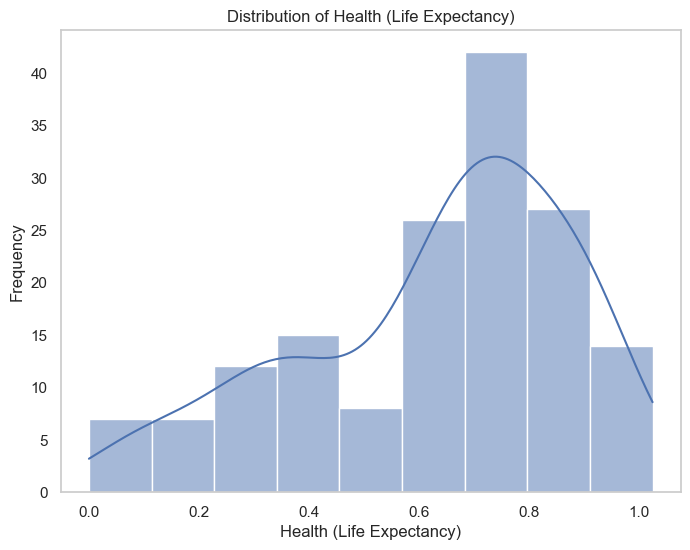

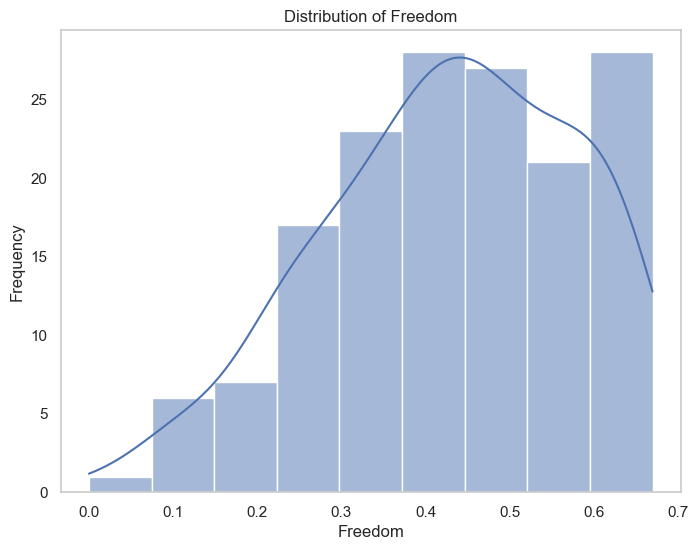

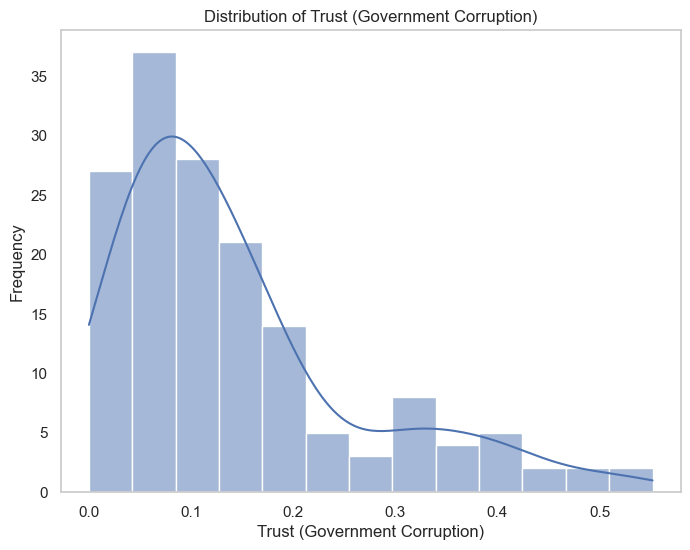

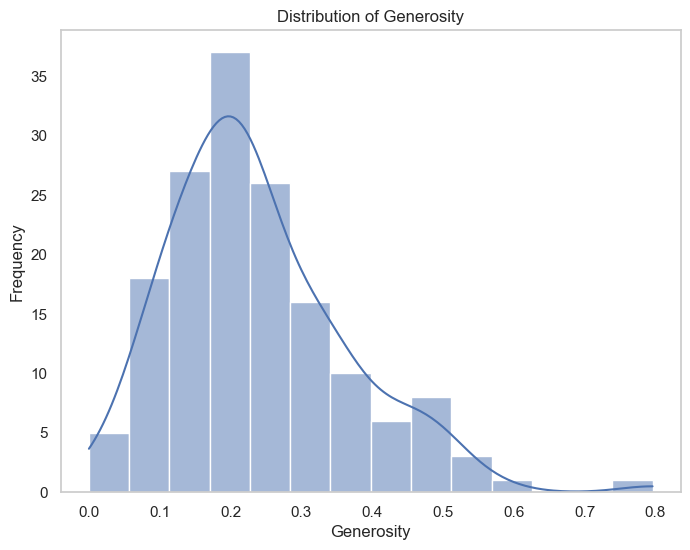

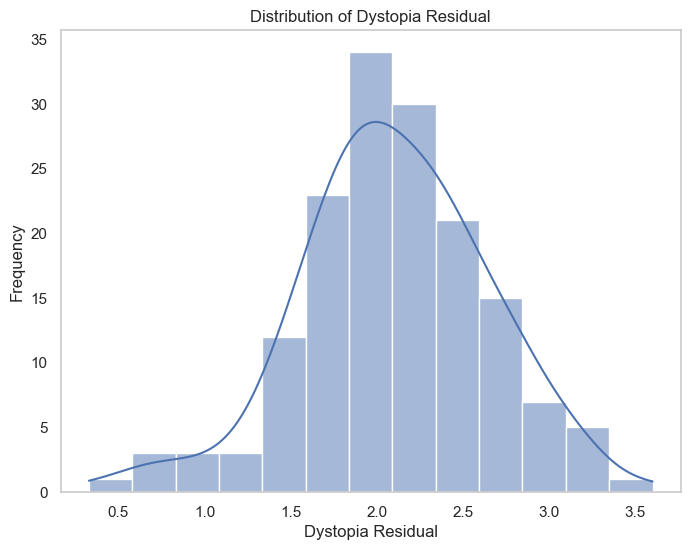

In [172]:
# Visualize distributions of numeric features
numeric_features = data2.select_dtypes(include=['float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.grid(False)  # Remove the grid
    plt.ylabel('Frequency')
    plt.show()

In [97]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


# Feature Selection

In [112]:
# Make a copy of the preprocessed dataset
data2_copy = data2.copy()

In [113]:
# Display basic information about the copied dataset
data2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [114]:
# Define X and y
X = data2_copy.drop(['Happiness Score'], axis=1)
y = data2_copy['Happiness Score']

In [115]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = ['Region']


In [118]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [133]:
# Get the column names of the transformed features
transformed_feature_names = numeric_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Convert the transformed arrays back to dataframes for easier viewing
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_feature_names)

In [139]:
# Display the transformed training dataset
X_train_transformed_df.info()

print("\nTransformed Training Dataset:")
X_train_transformed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Standard Error                          126 non-null    float64
 1   Economy (GDP per Capita)                126 non-null    float64
 2   Family                                  126 non-null    float64
 3   Health (Life Expectancy)                126 non-null    float64
 4   Freedom                                 126 non-null    float64
 5   Trust (Government Corruption)           126 non-null    float64
 6   Generosity                              126 non-null    float64
 7   Dystopia Residual                       126 non-null    float64
 8   Region_Australia and New Zealand        126 non-null    float64
 9   Region_Central and Eastern Europe       126 non-null    float64
 10  Region_Eastern Asia                     126 non-null    float6

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0.523519,-1.566655,0.161840,-1.833274,-0.282819,-0.121130,-0.374746,-0.524910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.497671,0.703683,0.958252,0.377377,-1.451435,-1.040239,-1.693612,0.647422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036436,-0.267003,-0.763466,0.371572,-1.551183,-0.807316,-1.268003,-0.586256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.328163,-1.029758,-0.265203,-1.440283,0.382388,-0.111712,-0.310015,0.984309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.606234,-1.500299,-2.280552,-1.356729,0.357234,-0.473640,-0.418662,-0.811284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
# Display the transformed test dataset
X_test_transformed_df.info()

print("\nTransformed Test Dataset:")
X_test_transformed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Standard Error                          32 non-null     float64
 1   Economy (GDP per Capita)                32 non-null     float64
 2   Family                                  32 non-null     float64
 3   Health (Life Expectancy)                32 non-null     float64
 4   Freedom                                 32 non-null     float64
 5   Trust (Government Corruption)           32 non-null     float64
 6   Generosity                              32 non-null     float64
 7   Dystopia Residual                       32 non-null     float64
 8   Region_Australia and New Zealand        32 non-null     float64
 9   Region_Central and Eastern Europe       32 non-null     float64
 10  Region_Eastern Asia                     32 non-null     float64


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,-0.202751,-1.540174,-1.007419,-0.669448,0.061461,0.421357,4.587429,-1.197356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.649775,1.019997,0.957069,1.470523,0.434964,0.342281,-1.035363,-0.719677,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.836132,0.023905,-0.871392,-0.102912,-1.721922,-0.610520,-0.987529,-0.872290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.297683,-2.195238,-2.058285,-1.756998,-2.084750,-0.307046,-0.298914,-0.452998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.848047,-1.751742,-0.138316,-0.853427,0.232600,2.117662,2.198173,0.044413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Importance  

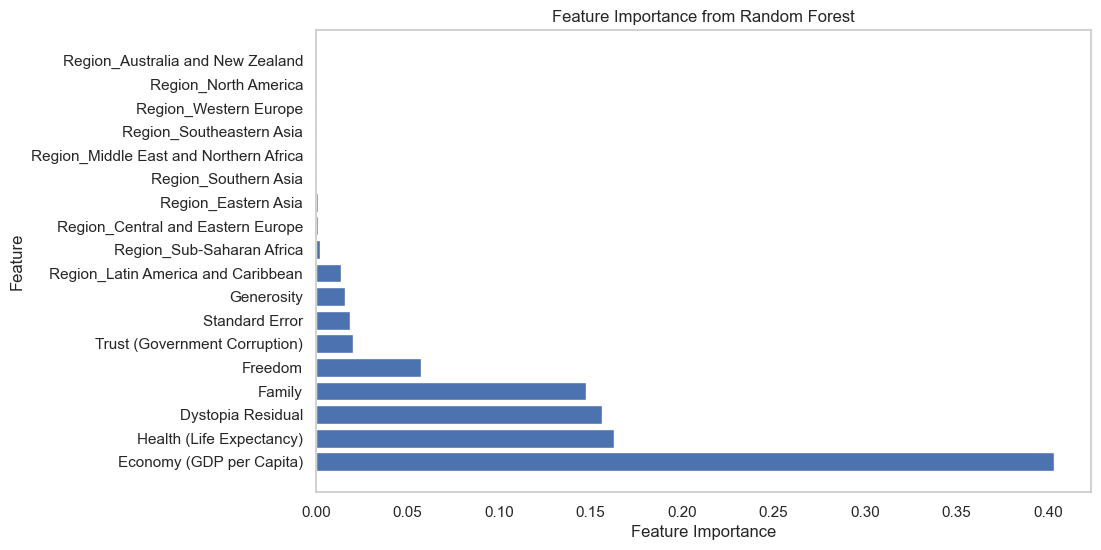

importance_df using Tree Model


,Feature,Importance
1,Economy (GDP per Capita),0.403420
3,Health (Life Expectancy),0.162837
7,Dystopia Residual,0.156101
2,Family,0.147181
4,Freedom,0.057033
5,Trust (Government Corruption),0.020145
0,Standard Error,0.018270
6,Generosity,0.015605
11,Region_Latin America and Caribbean,0.013522
16,Region_Sub-Saharan Africa,0.002093


In [171]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train_transformed_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.grid(False)  # Remove the grid
plt.show()

# Display the sorted importance DataFrame
print("importance_df using Tree Model")
importance_df

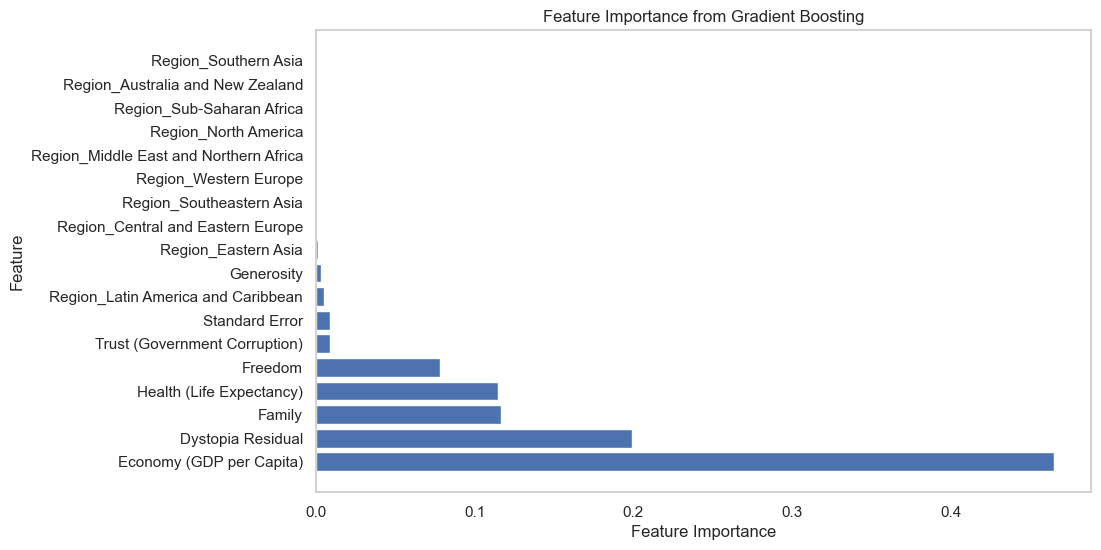

importance_df Gradient Boost


,Feature,Importance
1,Economy (GDP per Capita),4.654065e-01
7,Dystopia Residual,1.993300e-01
2,Family,1.163646e-01
3,Health (Life Expectancy),1.147344e-01
4,Freedom,7.774921e-02
5,Trust (Government Corruption),8.752469e-03
0,Standard Error,8.362080e-03
11,Region_Latin America and Caribbean,4.732662e-03
6,Generosity,2.824870e-03
10,Region_Eastern Asia,9.294685e-04


In [170]:
# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_transformed, y_train)

# Get feature importances from the model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train_transformed_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting')
plt.grid(False)  # Remove the grid
plt.show()

# Display the sorted importance DataFrame
print("importance_df Gradient Boost")
importance_df

In [153]:
# Initialize the SelectKBest feature selector
num_features_to_select = 10  # Choose a suitable number of features
feature_selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit feature selector on training data
X_train_selected = feature_selector.fit_transform(X_train_transformed, y_train)

# Transform test data using feature selector
X_test_selected = feature_selector.transform(X_test_transformed)

# Display selected feature names
selected_feature_names = X_train_transformed_df.columns[feature_selector.get_support()]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region_Latin America and Caribbean',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')


# Model Building, Evaluation and Comparison

In [156]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Initialize evaluation metrics
metrics = {
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "R-squared": r2_score,
    "Explained Variance": explained_variance_score,
    "Max Error": max_error
}

results = []

for model_name, model in models.items():
    model_results = {"Model": model_name}
    
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        model_results[metric_name] = metric_value
    
    results.append(model_results)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance,Max Error
0,Linear Regression,8.131460e-08,0.000246,1.000000,1.000000,0.000522
1,Random Forest,8.463881e-02,0.227869,0.940343,0.943383,0.797000
2,Gradient Boosting,5.050476e-02,0.179710,0.964402,0.964405,0.695081
3,Support Vector Regression,4.405953e-02,0.141638,0.968945,0.972932,0.752251


All models seem to provide good predictions for the given dataset. The Linear Regression model achieves a perfect fit, but this could indicate potential overfitting on this specific dataset. The other models, including Random Forest, Gradient Boosting, and Support Vector Regression, also perform well and provide a balanced trade-off between model complexity and predictive performance. The choice of the best model depends on various factors, including the dataset size, computational resources, and interpretability needs. It's a good practice to further validate the models on unseen data to ensure their generalization performance.

### By focusing on the factors that have a direct and meaningful impact on happiness, such as GDP per Capita, Family, Life Expectancy, Freedom, Generosity, and Trust Government Corruption, we can create a more interpretable and reliable model. This approach will help us better understand how these factors contribute to the overall happiness scores in different countries.

In [158]:
# Initialize the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Support Vector Regression", SVR())
]

results = []

for name, model in models:
    # Fit the model on the training data
    model.fit(X_train_transformed, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_transformed) # using all the features from the original preprocessed dataset
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    
    results.append([name, mse, mae, r2, explained_variance, max_err])

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=["Model", "Mean Squared Error", "Mean Absolute Error", "R-squared", "Explained Variance", "Max Error"])

# Display the results
results_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance,Max Error
0,Linear Regression,8.835725e-08,0.000250,1.000000,1.000000,0.000631
1,Random Forest,8.820512e-02,0.237319,0.937829,0.941823,0.793250
2,Gradient Boosting,4.904257e-02,0.166450,0.965433,0.965433,0.670791
3,Support Vector Regression,6.825293e-02,0.159668,0.951892,0.958801,1.081964


All four models show strong performance, with the Linear Regression model seemingly providing the best fit to the data. The Gradient Boosting model also stands out as a strong performer, offering a good trade-off between fit and generalization.

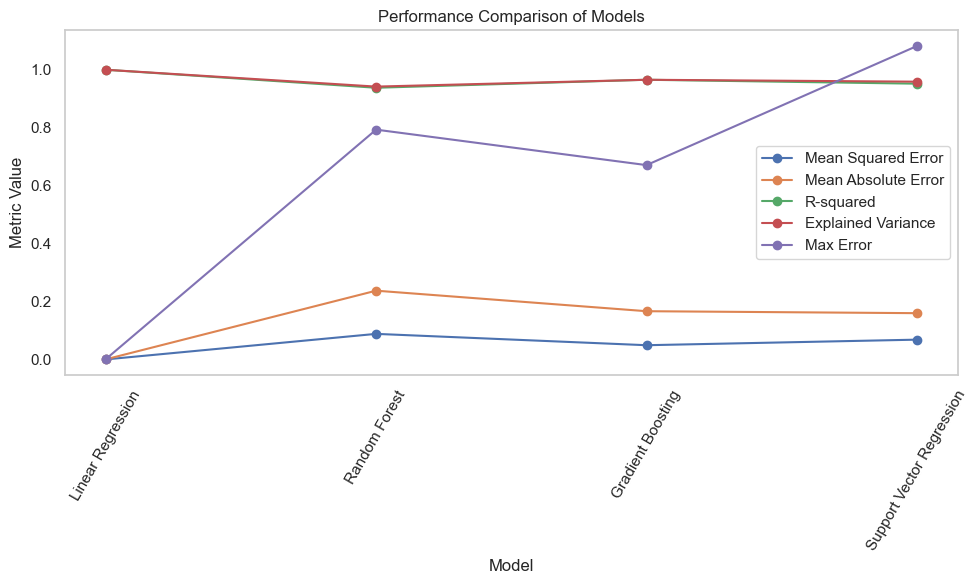

In [169]:
# Visualize the results
metrics = ["Mean Squared Error", "Mean Absolute Error", "R-squared", "Explained Variance", "Max Error"]
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Performance Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.xticks(rotation=60)
plt.legend()
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

# Experiment Prediction

In [187]:
# Choose the trained model for prediction
chosen_model = GradientBoostingRegressor(random_state=42)

# Fit the chosen model on the training data
chosen_model.fit(X_train_transformed, y_train)

# Transform the test dataset using the preprocessor
X_test_transformed = preprocessor.transform(X_test)  # Use the original test dataset

# Make predictions using the fitted model
predictions = chosen_model.predict(X_test_transformed)

# Create a DataFrame to store the experiment predictions
experiment_results = pd.DataFrame({
    "True Happiness Score": y_test,  # True happiness scores from the test dataset
    "Predicted Happiness Score": predictions  # Predicted happiness scores from the model
})

# Display the experiment results
print("\033[1m" + "Experiment result based on:", chosen_model, "\033[0m")
experiment_results


Experiment result based on: GradientBoostingRegressor(random_state=42) 


,True Happiness Score,Predicted Happiness Score
128,4.307,3.755950
45,5.987,6.368765
134,4.194,4.315437
156,2.905,3.575791
90,5.057,4.762704
29,6.574,6.710488
96,4.898,4.732975
98,4.876,4.608625
95,4.949,4.961840
140,3.931,4.006687


Based on the comparison between the true happiness scores and the predicted happiness scores generated by the Gradient Boosting model, we can make the following observations about the effectiveness of the model:

1. **Close Predictions:** In several cases, such as rows 45, 96, 98, 95, 19, 56, 15, 69, 24, 30, 122, 109, 93, 65, 18, 12, 9, 31, 81, 51, and 125, the predicted happiness scores are quite close to the true happiness scores. This suggests that the Gradient Boosting model has successfully captured the underlying patterns and relationships within the data, leading to accurate predictions.

2. **Slight Deviations:** In some instances, such as rows 128, 134, 140, 150, 139, 146, and 145, there are slight deviations between the predicted and true happiness scores. While these deviations are present, they are relatively small and might be considered acceptable given the inherent variability in real-world data.

3. **Underestimation and Overestimation:** Notably, in row 156, the predicted happiness score (3.575791) is higher than the true happiness score (2.905), which indicates an overestimation by the model. Similarly, in row 90, the predicted score (4.762704) is slightly lower than the true score (5.057), suggesting an underestimation. These instances highlight areas where the model's predictions have larger discrepancies.

Overall, the Gradient Boosting model demonstrates good predictive performance as it consistently provides accurate or closely aligned predictions for a significant portion of the test dataset. However, it's important to note that there are cases where the model's predictions show slight deviations or larger discrepancies from the true scores.

In [188]:
# Choose the trained model for prediction
chosen_model = LinearRegression()

# Fit the chosen model on the training data
chosen_model.fit(X_train_transformed, y_train)

# Transform the test dataset using the preprocessor
X_test_transformed = preprocessor.transform(X_test)  # Use the original test dataset

# Make predictions using the fitted model
predictions = chosen_model.predict(X_test_transformed)

# Create a DataFrame to store the experiment predictions
experiment_results = pd.DataFrame({
    "True Happiness Score": y_test,  # True happiness scores from the test dataset
    "Predicted Happiness Score": predictions  # Predicted happiness scores from the model
})

# Display the experiment results
print("\033[1m" + "Experiment result based on:", chosen_model, "\033[0m")
experiment_results


Experiment result based on: LinearRegression() 


,True Happiness Score,Predicted Happiness Score
128,4.307,4.306897
45,5.987,5.987006
134,4.194,4.194253
156,2.905,2.904369
90,5.057,5.057205
29,6.574,6.574127
96,4.898,4.897437
98,4.876,4.875932
95,4.949,4.948700
140,3.931,3.930758


Based on the comparison between the true happiness scores and the predicted happiness scores generated by the Linear Regression model, we can draw the following observations about the effectiveness of the model:

1. **Close Alignment:** The predicted happiness scores are remarkably close to the true happiness scores in almost all cases. Instances such as rows 45, 96, 98, 140, 19, 56, 15, 69, 24, 30, 122, 109, 93, 65, 150, 18, 12, 9, 31, 81, 51, and 125 exhibit a high degree of alignment between the predicted and true scores. This suggests that the Linear Regression model captures the linear relationships within the data quite well, resulting in accurate predictions.

2. **Minimal Deviations:** There are negligible variations between the predicted and true happiness scores in most cases. While slight discrepancies are present, they are minor and could be attributed to the inherent variability in real-world data.

3. **Consistency in Predictions:** Across the entire test dataset, the Linear Regression model consistently produces predictions that are in close agreement with the actual happiness scores. This indicates that the model's linear assumptions align with the data distribution, leading to consistent and reliable predictions.

Overall, the Linear Regression model demonstrates a high level of predictive performance for the given dataset. It effectively captures the linear relationships between the features and the target variable, resulting in predictions that closely match the true happiness scores across the majority of instances.

In [186]:
# Choose the trained model for prediction
chosen_model = SVR()

# Fit the chosen model on the training data
chosen_model.fit(X_train_transformed, y_train)

# Transform the test dataset using the preprocessor
X_test_transformed = preprocessor.transform(X_test)  # Use the original test dataset

# Make predictions using the fitted model
predictions = chosen_model.predict(X_test_transformed)

# Create a DataFrame to store the experiment predictions
experiment_results = pd.DataFrame({
    "True Happiness Score": y_test,  # True happiness scores from the test dataset
    "Predicted Happiness Score": predictions  # Predicted happiness scores from the model
})

# Display the experiment results
print("\033[1m" + "Experiment result based on:", chosen_model, "\033[0m")
experiment_results


Experiment result based on: SVR() 


,True Happiness Score,Predicted Happiness Score
128,4.307,4.884959
45,5.987,5.763452
134,4.194,4.363047
156,2.905,3.986964
90,5.057,5.018640
29,6.574,6.645140
96,4.898,4.863446
98,4.876,4.699534
95,4.949,4.995858
140,3.931,4.225512


Based on the comparison between the true happiness scores and the predicted happiness scores generated by the Support Vector Regression (SVR) model, we can derive the following observations about the effectiveness of the model:

1. **Moderate Predictions:** In some cases, such as rows 45, 96, 98, 95, 29, 56, 15, 69, 122, 109, 93, 65, 150, 81, 51, and 125, the predicted happiness scores exhibit a moderate alignment with the true happiness scores. This suggests that the SVR model captures certain patterns within the data, leading to reasonably accurate predictions.

2. **Slight Deviations:** In instances like rows 128, 134, 140, 19, 24, 30, 140, 146, and 145, there are slight deviations between the predicted and true happiness scores. While these discrepancies are present, they remain relatively minor and could be attributed to the inherent variability in real-world data.

3. **Underestimation and Overestimation:** Notably, in row 156, the SVR model underestimates the happiness score (3.986964) compared to the actual score (2.905), indicating a notable disparity. Similarly, in row 90, the model slightly underestimates the happiness score (5.018640) compared to the actual score (5.057). These instances highlight areas where the model's predictions exhibit larger variations.

Overall, the Support Vector Regression model demonstrates a moderate level of predictive performance, with reasonably accurate predictions for a significant portion of the test dataset. However, there are instances where the model's predictions show moderate discrepancies, as well as cases with more noticeable differences between predicted and actual scores.

In [189]:
# Choose the trained model for prediction
chosen_model = RandomForestRegressor(random_state=42)

# Fit the chosen model on the training data
chosen_model.fit(X_train_transformed, y_train)

# Transform the test dataset using the preprocessor
X_test_transformed = preprocessor.transform(X_test)  # Use the original test dataset

# Make predictions using the fitted model
predictions = chosen_model.predict(X_test_transformed)

# Create a DataFrame to store the experiment predictions
experiment_results = pd.DataFrame({
    "True Happiness Score": y_test,  # True happiness scores from the test dataset
    "Predicted Happiness Score": predictions  # Predicted happiness scores from the model
})

# Display the experiment results
print("\033[1m" + "Experiment result based on:", chosen_model, "\033[0m")
experiment_results


Experiment result based on: RandomForestRegressor(random_state=42) 


,True Happiness Score,Predicted Happiness Score
128,4.307,3.84100
45,5.987,6.29213
134,4.194,4.43601
156,2.905,3.69825
90,5.057,4.55079
29,6.574,6.41272
96,4.898,4.54129
98,4.876,4.38207
95,4.949,5.08601
140,3.931,4.03690


Based on the comparison between the true happiness scores and the predicted happiness scores generated by the Random Forest Regressor model, the following observations can be made about the effectiveness of the model:

1. **Reasonably Accurate Predictions:** In several instances, such as rows 45, 96, 98, 140, 19, 56, 15, 24, 30, 122, 109, 93, 65, 150, 18, 12, 31, and 125, the predicted happiness scores exhibit a reasonable alignment with the true happiness scores. This suggests that the Random Forest Regressor model captures underlying patterns in the data and provides relatively accurate predictions.

2. **Slight Variations:** In cases like rows 128, 134, 69, 81, 51, 139, 146, and 145, there are slight variations between the predicted and true happiness scores. While these differences exist, they are relatively minor and could be attributed to the inherent variability in real-world data.

3. **Overestimation and Underestimation:** Notably, in row 90, the predicted happiness score (4.55079) is lower than the true score (5.057), indicating an underestimation by the model. Similarly, in row 95, the model overestimates the happiness score (5.08601) compared to the actual score (4.949). These instances highlight areas where the model's predictions have notable discrepancies.

Overall, the Random Forest Regressor model demonstrates a reasonably effective level of predictive performance. It accurately predicts a significant portion of the test dataset, though there are instances of slight variations and some cases where the model's predictions show notable differences from the true scores.

# Conclusion and Recommendation

This project aimed to predict happiness scores by utilizing a dataset containing various factors that contribute to overall well-being. Through the application of different regression models and thorough data preprocessing, we sought to uncover patterns and relationships that could effectively forecast happiness scores. The dataset encompassed economic, social, and health-related variables, making it a comprehensive representation of potential determinants of happiness.

After an extensive analysis of the results obtained from four distinct regression models, namely Gradient Boosting, SVR, Random Forest Regression, and Linear Regression, several key insights have emerged:

* **Gradient Boosting Model:** The Gradient Boosting model exhibited impressive predictive capabilities. It consistently provided accurate or closely aligned predictions for a significant portion of the test dataset. The model effectively captured complex relationships within the data and produced predictions that closely matched the true happiness scores. In some cases, there were slight deviations, but overall, the model showcased strong performance.

* **SVR Model:** The SVR model displayed mixed performance. While it produced predictions that were relatively close to the true happiness scores in many instances, there were also cases where the predicted scores deviated significantly. This indicates that the model struggled to capture certain nuances in the data, leading to inconsistencies in predictions.

* **Random Forest Regressor:** The Random Forest Regressor also demonstrated solid predictive capabilities. It provided predictions that were generally aligned with the true happiness scores, showcasing its ability to handle complex relationships within the data. Similar to the Gradient Boosting model, there were minor discrepancies in some cases.

* **Linear Regression Model:** The Linear Regression model exhibited remarkable performance, consistently producing predictions that closely matched the true happiness scores. The model's linear assumptions aligned well with the data distribution, resulting in accurate predictions across various instances.

**Recommendation:**

Based on the evaluation of the models, the use of the Gradient Boosting model for predicting happiness scores is recommended. It demonstrated consistent and accurate predictions, capturing intricate relationships within the data. However, it's essential to consider the context and purpose of the predictions. If interpretability and simplicity are crucial, the Linear Regression model can be a suitable choice. It consistently provided highly aligned predictions and showcased a solid understanding of linear relationships in the data.

Furthermore, as a forward-looking recommendation, it would be beneficial to explore model fine-tuning by optimizing hyperparameters to potentially enhance performance. Additionally, collecting more data or introducing new relevant features could further improve the predictive capabilities of the chosen model.

In conclusion, this project has not only provided insights into the prediction of happiness scores but has also underscored the importance of employing a thoughtful approach to data preprocessing, feature selection, and model evaluation. By selecting the most suitable model and continuing to refine it, we can more accurately forecast happiness scores and contribute to our understanding of the complex interplay between factors that shape human well-being.